# PIZZA PLACE SALES

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
df1 = pd.read_csv('pizzas.csv')
df1.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [3]:
# importing the dataset
df2 = pd.read_csv('pizza_types.csv', encoding = 'latin-1')
df2.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [4]:
# importing the dataset
df3 = pd.read_csv('orders.csv')
df3.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [5]:
# importing the dataset
df4 = pd.read_csv('order_details.csv')
df4.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [6]:
# importing the dataset
df5 = pd.read_csv('data_dictionary.csv')
df5.head()

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...


In [7]:
# Merge the first and second datasets
df_final = pd.merge(df1, df2, on='pizza_type_id', how='left')

In [8]:
# Merge the performance and demographics datasets
df_main = pd.merge(df3, df4, on='order_id', how='left')

In [9]:
df_final.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [10]:
df_main.head()

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1


In [11]:
# Merge the merged main and final datasets
df = pd.merge(df_main, df_final, on='pizza_id', how='left')

In [12]:
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


## Data Understanding

In [13]:
# checking for the size of the dataset
df.shape

(48620, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


Note that we have no missing values and a Datatype Problem

In [15]:
# Convert date and time columns
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# Creating Revenue Column
df['revenue'] = df['quantity'] * df['price']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  revenue           48620 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 4.8+ MB


In [17]:
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [18]:
# Extract time features
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

In [19]:
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,revenue,hour,day_of_week,month,month_name
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,1,January
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,1,January
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,1,January
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,1,January
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,1,January


## PIZZA PLACE SALES ANALYSIS - 2015

#### 1. TOTAL REVENUE

In [20]:
# Total Revenue
total_revenue = df['revenue'].sum()
print(f"TOTAL REVENUE: ${total_revenue:,.2f}")

TOTAL REVENUE: $817,860.05


#### 2. TOTAL QUANTITY SOLD

In [21]:
# 2. Total Quantity Sold
total_quantity = df['quantity'].sum()
print(f"TOTAL QUANTITY SOLD: {total_quantity:,} pizzas")

TOTAL QUANTITY SOLD: 49,574 pizzas


#### 3. TOTAL ORDERS

In [22]:
# Total Orders
total_orders = df['order_id'].nunique()
print(f"TOTAL ORDERS: {total_orders:,} orders")

TOTAL ORDERS: 21,350 orders


#### 4. PIZZA TYPES

In [23]:
# Pizza Types
pizza_types = df['pizza_type_id'].nunique()
print(f"NUMBER OF PIZZA TYPES: {pizza_types} types")

NUMBER OF PIZZA TYPES: 32 types


#### 5. AVERAGE PRICE

In [24]:
# Average Price
avg_price = df['price'].mean()
print(f"AVERAGE PRICE PER PIZZA: ${avg_price:.2f}")

AVERAGE PRICE PER PIZZA: $16.49


#### 6. PEAK HOURS OF SALES

In [25]:
# Peak Hours of Sales
hourly_sales = df.groupby('hour').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique'
}).round(2)
hourly_sales.columns = ['Revenue', 'Quantity', 'Orders']
hourly_sales = hourly_sales.sort_values('Revenue', ascending=False)
print(hourly_sales.head(5))
print(f"\nPeak hour: {hourly_sales.index[0]}:00 (${hourly_sales.iloc[0]['Revenue']:,.2f} in revenue)")

        Revenue  Quantity  Orders
hour                             
12    111877.90      6776    2520
13    106065.70      6413    2455
18     89296.85      5417    2399
17     86237.45      5211    2336
19     72628.90      4406    2009

Peak hour: 12:00 ($111,877.90 in revenue)


#### 7. SALES BY DAY OF WEEK

In [26]:
# Salea by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('day_of_week').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique'
}).round(2)
daily_sales = daily_sales.reindex(day_order)
daily_sales.columns = ['Revenue', 'Quantity', 'Orders']
print(daily_sales)
print(f"\nBest day: {daily_sales['Revenue'].idxmax()} (${daily_sales['Revenue'].max():,.2f})")

               Revenue  Quantity  Orders
day_of_week                             
Monday       107329.55      6485    2794
Tuesday      114133.80      6895    2973
Wednesday    114408.40      6946    3024
Thursday     123528.50      7478    3239
Friday       136073.90      8242    3538
Saturday     123182.40      7493    3158
Sunday        99203.50      6035    2624

Best day: Friday ($136,073.90)


#### 8. TOP 5 BESTSELLING PIZZAS

In [27]:
# Top % Best Selling Pizzas
top_pizzas = df.groupby('name').agg({
    'quantity': 'sum',
    'revenue': 'sum'
}).sort_values('quantity', ascending=False).head(5)
top_pizzas.columns = ['Quantity Sold', 'Revenue']
print(top_pizzas)

                            Quantity Sold   Revenue
name                                               
The Classic Deluxe Pizza             2453  38180.50
The Barbecue Chicken Pizza           2432  42768.00
The Hawaiian Pizza                   2422  32273.25
The Pepperoni Pizza                  2418  30161.75
The Thai Chicken Pizza               2371  43434.25


#### 9. MONTHLY SALES TREND

In [28]:
# Monthly Sales Trend
monthly_sales = df.groupby('month_name').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique'
}).round(2)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)
monthly_sales.columns = ['Revenue', 'Quantity', 'Orders']
print(monthly_sales)

             Revenue  Quantity  Orders
month_name                            
January     69793.30      4232    1845
February    65159.60      3961    1685
March       70397.10      4261    1840
April       68736.80      4151    1799
May         71402.75      4328    1853
June        68230.20      4107    1773
July        72557.90      4392    1935
August      68278.25      4168    1841
September   64180.05      3890    1661
October     64027.60      3883    1646
November    70395.35      4266    1792
December    64701.15      3935    1680


#### 10. BOTTOM 5 PERFORMING PIZZAS

In [29]:
# Bottom 5 Performing Pizzas
bottom_pizzas = df.groupby('name').agg({
    'quantity': 'sum',
    'revenue': 'sum'
}).sort_values('quantity', ascending=True).head(5)
bottom_pizzas.columns = ['Quantity Sold', 'Revenue']
print(bottom_pizzas)

                           Quantity Sold   Revenue
name                                              
The Brie Carre Pizza                 490  11588.50
The Mediterranean Pizza              934  15360.50
The Calabrese Pizza                  937  15934.25
The Spinach Supreme Pizza            950  15277.75
The Soppressata Pizza                961  16425.75


## ADDITIONAL INSIGHTS

#### SALES BY CATEGORY

In [30]:
# Sales by Category
category_sales = df.groupby('category').agg({
    'revenue': 'sum',
    'quantity': 'sum'
}).sort_values('revenue', ascending=False)
category_sales.columns = ['Revenue', 'Quantity']
print(category_sales)

            Revenue  Quantity
category                     
Classic   220053.10     14888
Supreme   208197.00     11987
Chicken   195919.50     11050
Veggie    193690.45     11649


#### SALES BY SIZE

In [31]:
# Sales by Size
size_sales = df.groupby('size').agg({
    'revenue': 'sum',
    'quantity': 'sum'
}).sort_values('revenue', ascending=False)
size_sales.columns = ['Revenue', 'Quantity']
print(size_sales)

        Revenue  Quantity
size                     
L     375318.70     18956
M     249382.25     15635
S     178076.50     14403
XL     14076.00       552
XXL     1006.60        28


#### AVERAGE ORDER VALUE

In [32]:
# Average order value
avg_order_value = total_revenue / total_orders
print(f"AVERAGE ORDER VALUE: ${avg_order_value:.2f}")

AVERAGE ORDER VALUE: $38.31


#### PIZZAS PER ORDER

In [33]:
# Pizzas per order
pizzas_per_order = total_quantity / total_orders
print(f"AVERAGE PIZZAS PER ORDER: {pizzas_per_order:.2f}")

AVERAGE PIZZAS PER ORDER: 2.32


#### BUSIEST VS QUIETEST PERIODS

In [34]:
# Busiest vs Quietest periods
print("\n15. BUSIEST VS QUIETEST PERIODS:")
print(f"Busiest Hour: {hourly_sales.index[0]}:00")
print(f"Quietest Hour: {hourly_sales.index[-1]}:00")
print(f"Busiest Day: {daily_sales['Revenue'].idxmax()}")
print(f"Quietest Day: {daily_sales['Revenue'].idxmin()}")
print(f"Best Month: {monthly_sales['Revenue'].idxmax()}")
print(f"Worst Month: {monthly_sales['Revenue'].idxmin()}")


15. BUSIEST VS QUIETEST PERIODS:
Busiest Hour: 12:00
Quietest Hour: 9:00
Busiest Day: Friday
Quietest Day: Sunday
Best Month: July
Worst Month: October


## VISUALIZATIONS

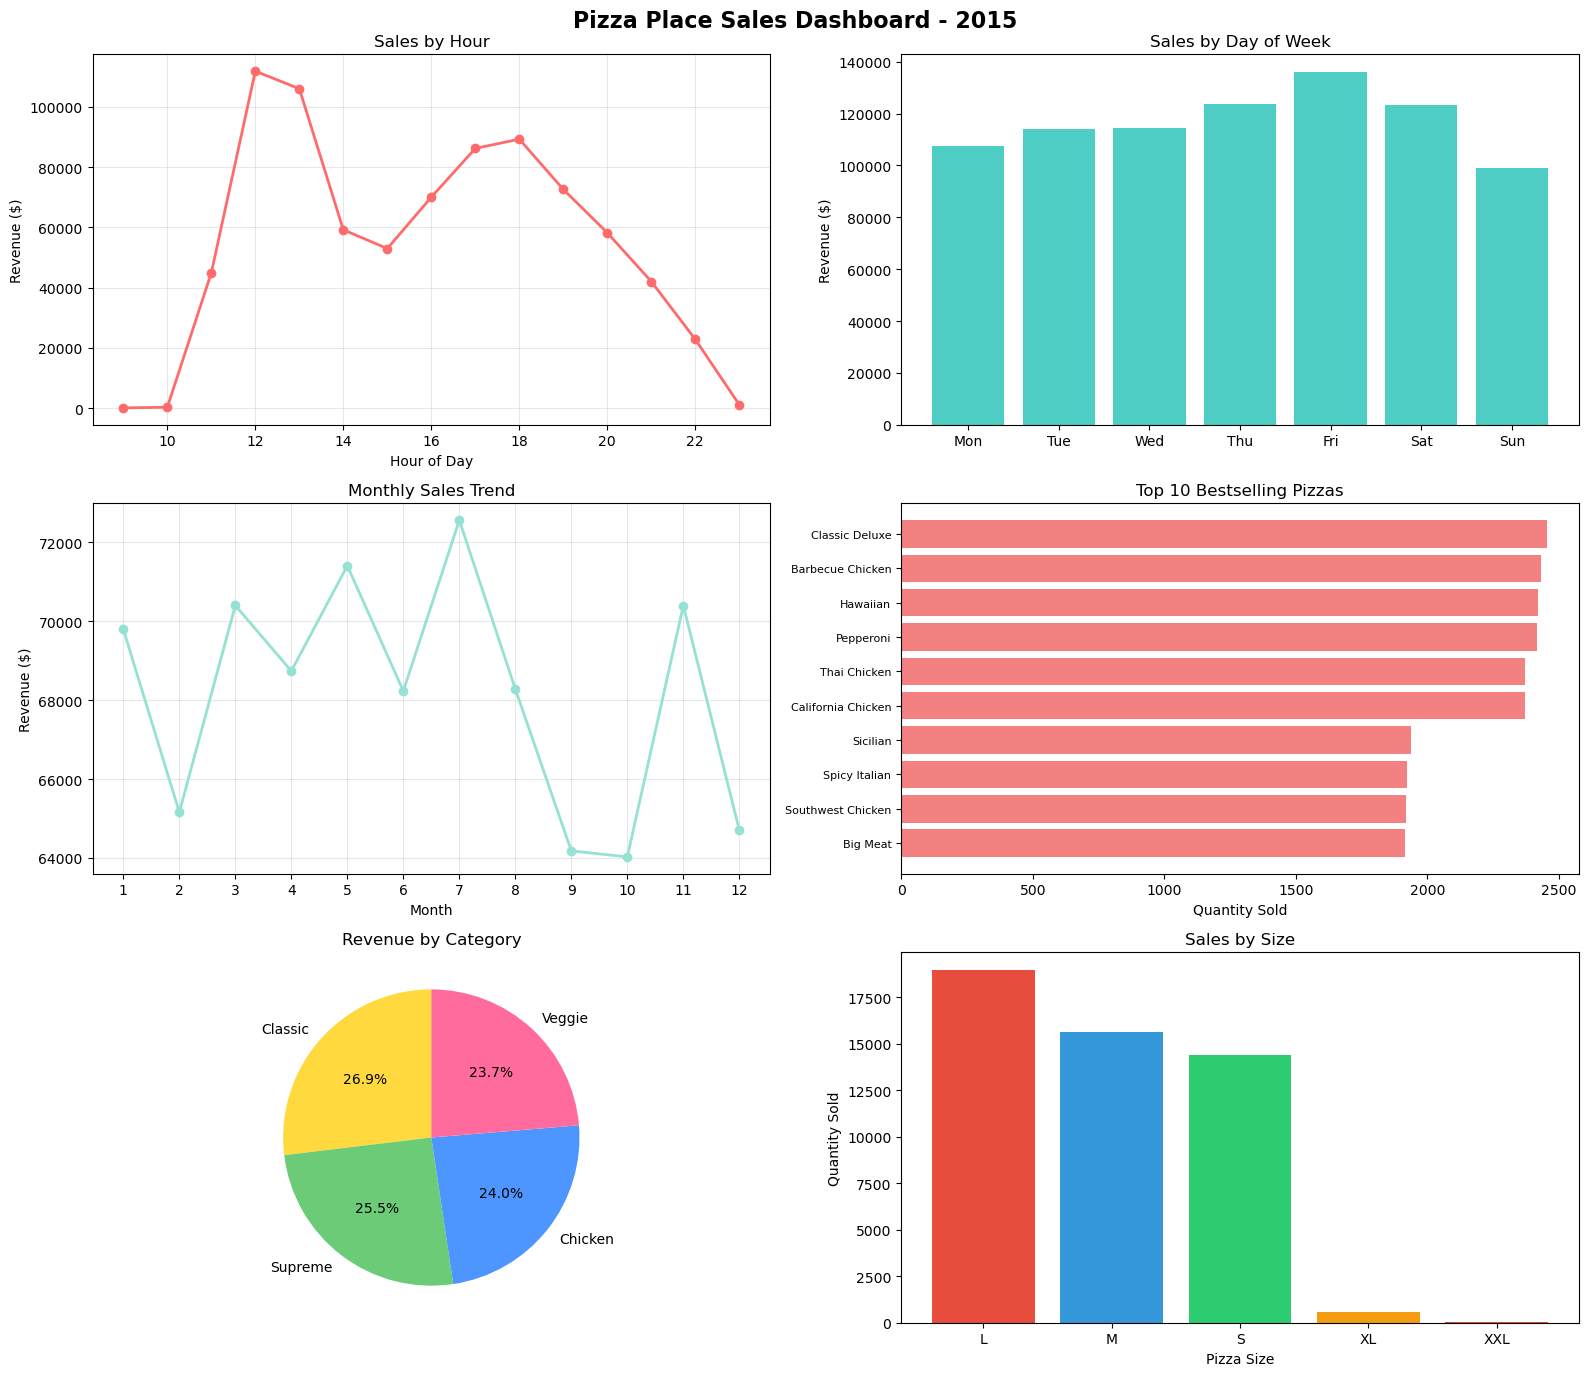

In [35]:
# Create visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Pizza Place Sales Dashboard - 2015', fontsize=16, fontweight='bold')

# 1. Hourly Sales
ax1 = axes[0, 0]
hourly_rev = df.groupby('hour')['revenue'].sum().sort_index()
ax1.plot(hourly_rev.index, hourly_rev.values, marker='o', linewidth=2, color='#FF6B6B')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Revenue ($)')
ax1.set_title('Sales by Hour')
ax1.grid(True, alpha=0.3)

# 2. Daily Sales
ax2 = axes[0, 1]
daily_rev = df.groupby('day_of_week')['revenue'].sum().reindex(day_order)
ax2.bar(range(len(day_order)), daily_rev.values, color='#4ECDC4')
ax2.set_xticks(range(len(day_order)))
ax2.set_xticklabels([d[:3] for d in day_order], rotation=0)
ax2.set_ylabel('Revenue ($)')
ax2.set_title('Sales by Day of Week')

# 3. Monthly Trend
ax3 = axes[1, 0]
monthly_rev = df.groupby('month')['revenue'].sum()
ax3.plot(monthly_rev.index, monthly_rev.values, marker='o', linewidth=2, color='#95E1D3')
ax3.set_xlabel('Month')
ax3.set_ylabel('Revenue ($)')
ax3.set_title('Monthly Sales Trend')
ax3.set_xticks(range(1, 13))
ax3.grid(True, alpha=0.3)

# 4. Top 10 Pizzas
ax4 = axes[1, 1]
top10 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)
ax4.barh(range(len(top10)), top10.values, color='#F38181')
ax4.set_yticks(range(len(top10)))
ax4.set_yticklabels([name.replace('The ', '').replace(' Pizza', '') for name in top10.index], fontsize=8)
ax4.set_xlabel('Quantity Sold')
ax4.set_title('Top 10 Bestselling Pizzas')
ax4.invert_yaxis()

# 5. Sales by Category
ax5 = axes[2, 0]
cat_sales = df.groupby('category')['revenue'].sum().sort_values(ascending=False)
colors = ['#FFD93D', '#6BCB77', '#4D96FF', '#FF6B9D']
ax5.pie(cat_sales.values, labels=cat_sales.index, autopct='%1.1f%%', colors=colors, startangle=90)
ax5.set_title('Revenue by Category')

# 6. Sales by Size
ax6 = axes[2, 1]
size_sales_viz = df.groupby('size')['quantity'].sum().sort_values(ascending=False)
ax6.bar(size_sales_viz.index, size_sales_viz.values, color=['#E74C3C', '#3498DB', '#2ECC71', '#F39C12'])
ax6.set_xlabel('Pizza Size')
ax6.set_ylabel('Quantity Sold')
ax6.set_title('Sales by Size')

plt.tight_layout()
plt.show()